# Simple Linear Regression

The goal of this project was to build a linear regression model from the ground up using numpy.

In [1]:
%matplotlib inline

#imports
from numpy import *
import matplotlib.pyplot as plt

#### Import the data
Here, we're using a dataset with two columns containing the amount of hours studied and the test scores students achieved, respectively.

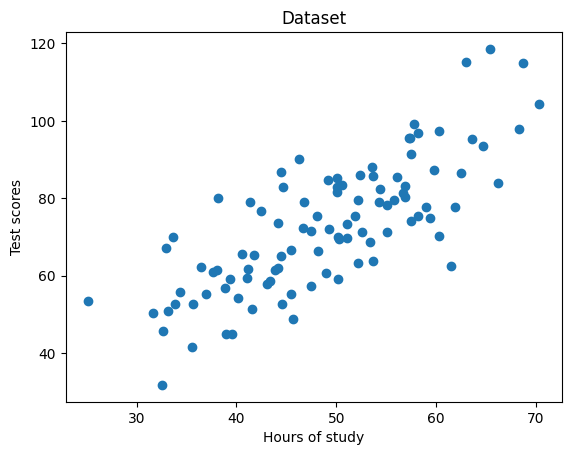

In [2]:
points = genfromtxt('data.csv', delimiter=',')

#Extract columns
x = array(points[:,0])
y = array(points[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

#### Defining the hyperparamters

In [3]:
#hyperparamters
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 10

#### Define cost function

In [4]:
def compute_cost(b, m, points):
    total_cost = 0
    N = float(len(points))
    
    #Compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    #Return average of squared error
    return total_cost/N

#### Define Gradient Descent functions

In [18]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []

    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, array(points), learning_rate)

    return [b, m, cost_graph]

def step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    #Update current m and b
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, m_updated

#### Run gradient_descent_runner() to get optimized parameters b and m

In [6]:
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))

Optimized b: 0.02963934787473239
Optimized m: 1.4774173755483797
Minimized cost: 112.65585181499746


#### Plotting the cost per iterations

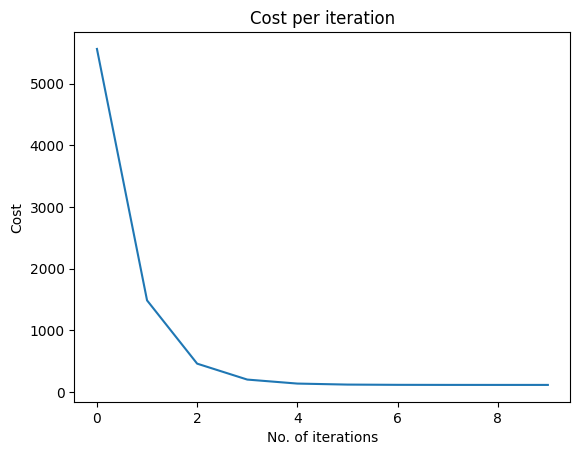

In [7]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

Gradient descent converges to local minimum after 5 iterations

#### Plot line of best fit

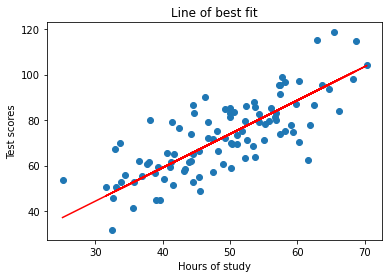

In [8]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = m * x + b
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

You may modify this notebook to submit your answers to the following questions.

Question 1: Change the learning rate for 0.001, 0.005 and 0.00001 and plot cost_graph for each of these learning rates.

Question 2: Modify step_gradient function to implement stochastic gradient descent. Hint: This was explained during the class. Stochasticity in this context means there is a randomness in the order of the inputs i.e., before every iteration of gradient descent, shuffle the inputs. We also update the parameters for each individual input instead of updating them for the whole data at one shot. We do this to prevent over fitting and make the model more generalized. 

Question 3: Modify step_gradient function to implement mini-batch stochastic gradient descent. Hint: In stochastic gradient descent, all the parameters are updated for each input. This can lead to slow convergence. Hence, in each iteration, 1) we first shuffle the data, 2) we then create minibatches of the inputs and update the parameters based on the gradients computed for each of these batches.

Question 4: What are the benefits of gradient descent compared to normal equation w* = ((XX^T)^-1)*(XY).

Question 5: Explain the difference between PCA and Linear Regression using examples on a plot.

In [8]:
#hyperparamters
learning_rate = 0.005
initial_b = 0
initial_m = 0
num_iterations = 10

In [12]:
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))

Optimized b: -1781902740219.794
Optimized m: -90660410246275.94
Minimized cost: 2.048980359894753e+31


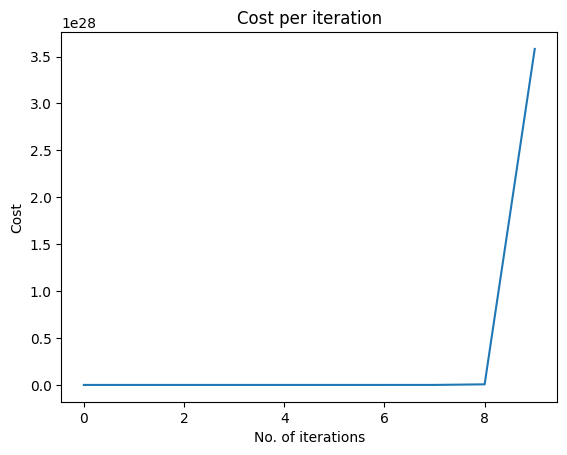

In [11]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

In [14]:
#hyperparamters
learning_rate = 0.00001
initial_b = 0
initial_m = 0
num_iterations = 10

In [15]:
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))

Optimized b: 0.011694288874113378
Optimized m: 0.5919283357463264
Minimized cost: 2073.937530133058


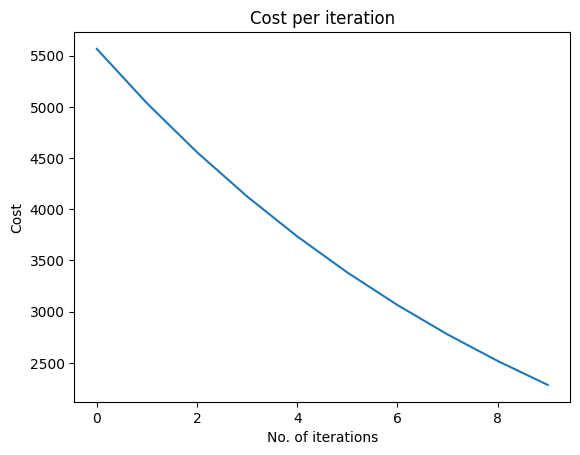

In [16]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

In [27]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []

    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, array(points), learning_rate)

    return [b, m, cost_graph]

def step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    i = random.randint(N)
    x = points[i, 0]
    y = points[i, 1]
    m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
    b_gradient += - (2/N) * (y - (m_current * x + b_current))
        
    #Update current m and b
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, m_updated

In [28]:
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))

Optimized b: 0.0001421235340347704
Optimized m: 0.007100506492264155
Minimized cost: 5512.877121544189


In [34]:
import numpy as np

In [35]:

def step_gradient(b_current, m_current, points, learning_rate, batch_size=10):
    
    np.random.shuffle(points)
    for i in range(0, len(points), batch_size):
        batch = points[i:i+batch_size]
        
        m_gradient = 0
        b_gradient = 0
    
        for x, y in batch:
            m_gradient += -2 * x * (y - (m_current * x + b_current))
            b_gradient += -2 * (y - (m_current * x + b_current))

        batch_size_actual = len(batch)
        m_gradient /= batch_size_actual
        b_gradient /= batch_size_actual

        m_current -= learning_rate * m_gradient
        b_current -= learning_rate * b_gradient
    
    return b_current, m_current


In [36]:
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))

Optimized b: 0.029401828165775617
Optimized m: 1.4704918526335289
Minimized cost: 112.82706594792162


Question 4: What are the benefits of gradient descent compared to normal equation w* = ((XX^T)^-1)*(XY).

Answer: Gradient descent works better than the normal equation because it iteratively upodates parameters without needing to compute large matrix inverses. (X X^T)^-1 is a computationally expensive operation O(n^3)

Moreover, the normal equatioon requires the program to store and invert large matrices which consumes significant memory, but for gradient descent, only a few parameters and gradients need to be stored at a time.

Question 5: Explain the difference between PCA and Linear Regression using examples on a plot.

PCA finds the directions of maximum varience in data. It is used for dimensionality reduction and feature extraction. Linear regression finds a best fit line to predict an output variable Y from input X.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression


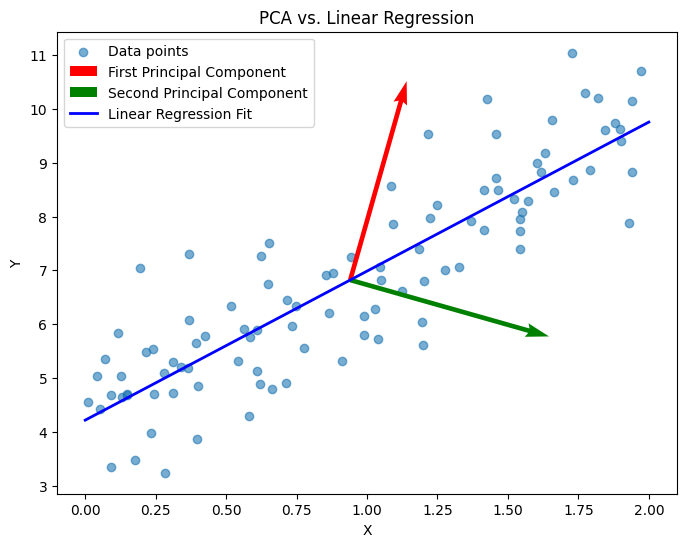

In [39]:

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)  
    
data = np.hstack((X, Y))
pca = PCA(n_components=2)
pca.fit(data)
pc1 = pca.components_[0]  
pc2 = pca.components_[1] 
mean = pca.mean_

reg = LinearRegression()
reg.fit(X, Y)
x_fit = np.linspace(0, 2, 100).reshape(-1, 1)
y_fit = reg.predict(x_fit)

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label="Data points", alpha=0.6)

plt.quiver(mean[0], mean[1], pc1[0], pc1[1], color='r', scale=3, label="First Principal Component")
plt.quiver(mean[0], mean[1], pc2[0], pc2[1], color='g', scale=3, label="Second Principal Component")

plt.plot(x_fit, y_fit, color='blue', linewidth=2, label="Linear Regression Fit")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("PCA vs. Linear Regression")
plt.show()


PCA displays principal components as arrows and finds the direction of the maximum spread, linear regression plots a best fit line.

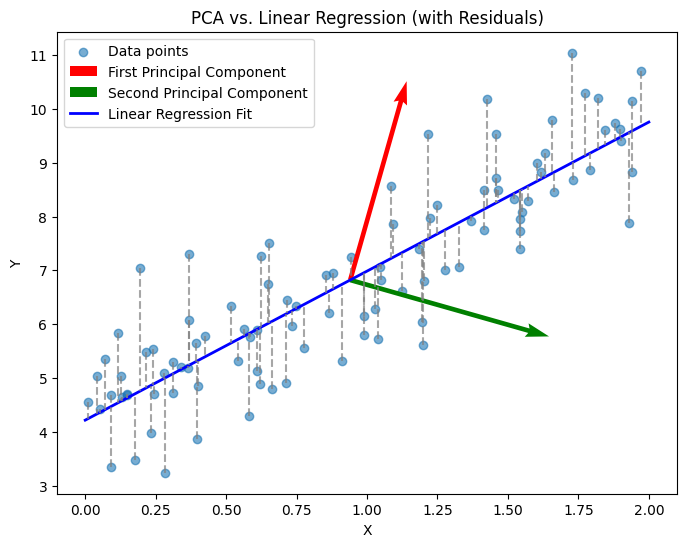

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with noise

# Perform PCA
data = np.hstack((X, Y))
pca = PCA(n_components=2)
pca.fit(data)
pc1 = pca.components_[0]  # First principal component
pc2 = pca.components_[1]  # Second principal component
mean = pca.mean_

# Perform Linear Regression
reg = LinearRegression()
reg.fit(X, Y)
Y_pred = reg.predict(X)  # Predicted Y values
x_fit = np.linspace(0, 2, 100).reshape(-1, 1)
y_fit = reg.predict(x_fit)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label="Data points", alpha=0.6)

# Plot PCA principal components
plt.quiver(mean[0], mean[1], pc1[0], pc1[1], color='r', scale=3, label="First Principal Component")
plt.quiver(mean[0], mean[1], pc2[0], pc2[1], color='g', scale=3, label="Second Principal Component")

# Plot Linear Regression fit
plt.plot(x_fit, y_fit, color='blue', linewidth=2, label="Linear Regression Fit")

# Plot residual errors (vertical lines from actual Y to predicted Y)
for i in range(len(X)):
    plt.plot([X[i], X[i]], [Y[i], Y_pred[i]], color='gray', linestyle='dashed', alpha=0.7)

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("PCA vs. Linear Regression (with Residuals)")
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

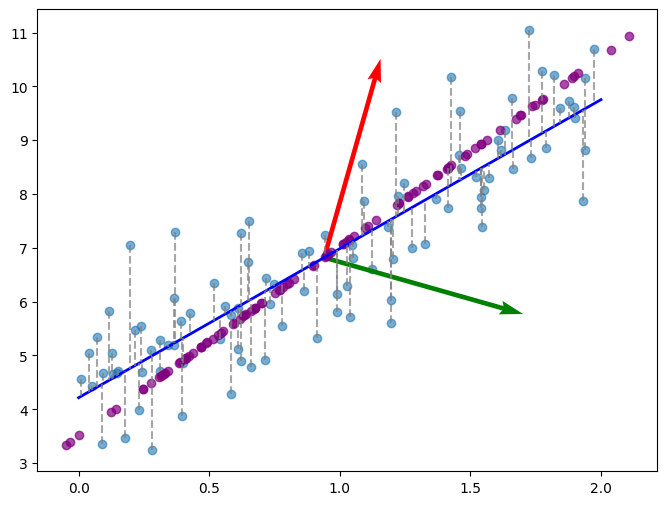

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with noise

# Combine X and Y into a dataset
data = np.hstack((X, Y))

# Perform PCA
pca = PCA(n_components=2)
pca.fit(data)
pc1 = pca.components_[0]  # First principal component
pc2 = pca.components_[1]  # Second principal component
mean = pca.mean_

# Project points onto the first principal component
projections = np.dot(data - mean, pc1)[:, np.newaxis] * pc1 + mean

# Perform Linear Regression
reg = LinearRegression()
reg.fit(X, Y)
Y_pred = reg.predict(X)  # Predicted Y values
x_fit = np.linspace(0, 2, 100).reshape(-1, 1)
y_fit = reg.predict(x_fit)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label="Data points", alpha=0.6)

# Plot PCA principal components
plt.quiver(mean[0], mean[1], pc1[0], pc1[1], color='r', scale=3, label="First Principal Component")
plt.quiver(mean[0], mean[1], pc2[0], pc2[1], color='g', scale=3, label="Second Principal Component")

# Plot Linear Regression fit
plt.plot(x_fit, y_fit, color='blue', linewidth=2, label="Linear Regression Fit")

# Plot residual errors for Linear Regression
for i in range(len(X)):
    plt.plot([X[i], X[i]], [Y[i], Y_pred[i]], color='gray', linestyle='dashed', alpha=0.7)

# Plot PCA projections
plt.scatter(projections[:, 0], projections[:, 1], color='purple', label="PCA Projections", alpha=0.7)
for i in range(len(X)):
    plt.plot([X[i], projections[i, 0]], [Y[i], projections[i, 1]], color='purple', linestyle='dashed', alpha=0.7)

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("PCA vs. Linear Regression (with Residuals & PCA Projections)")
plt.show()
